<a href="https://colab.research.google.com/github/trunghq0205/projects/blob/main/Thesis/Stratety_1_sharpe_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stratety 1: Performance**

# **Load finetuned model**

In [ ]:
!gdown 1KawsXQNvBB9F7onqFaAMShX1FH9fnR6U
!unzip ./uni2ts.zip

Downloading...
From (original): https://drive.google.com/uc?id=1KawsXQNvBB9F7onqFaAMShX1FH9fnR6U
From (redirected): https://drive.google.com/uc?id=1KawsXQNvBB9F7onqFaAMShX1FH9fnR6U&confirm=t&uuid=e6601be8-5016-465e-abe6-998a8f889be0
To: /content/uni2ts.zip
100% 342M/342M [00:05<00:00, 59.5MB/s]
Archive:  ./uni2ts.zip
   creating: uni2ts/
   creating: uni2ts/.git/
   creating: uni2ts/.github/
   creating: uni2ts/cli/
   creating: uni2ts/dataset/
   creating: uni2ts/example/
   creating: uni2ts/finetune/
   creating: uni2ts/outputs/
   creating: uni2ts/project/
   creating: uni2ts/src/
   creating: uni2ts/test/
  inflating: uni2ts/CODEOWNERS       
  inflating: uni2ts/forecast.pkl     
  inflating: uni2ts/CODE_OF_CONDUCT.md  
  inflating: uni2ts/SECURITY.md      
  inflating: uni2ts/CITATION.cff     
  inflating: uni2ts/CONTRIBUTING.md  
  inflating: uni2ts/.pre-commit-config.yaml  
  inflating: uni2ts/pyproject.toml   
  inflating: uni2ts/README.md        
  inflating: uni2ts/.gitignore

In [ ]:
cd uni2ts

/content/uni2ts


In [ ]:
!pip install -e '.[notebook]'

Obtaining file:///content/uni2ts
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.8/153.8 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 17.8

In [ ]:
cd uni2ts

/content/uni2ts


In [ ]:
%env CUSTOM_DATA_PATH=./finetune

env: CUSTOM_DATA_PATH=./finetune


# **Bonllinger Band**

Data bao gồm 250 ngày giao dịch trong năm 2019

In [ ]:
pwd

'/content/uni2ts'

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('dataset/VN30/VN30_2018_2019.csv')
data

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE,VN30
0,2018-09-04,8.78,21.69,79.25,17.29,16.450,71.42,7.16,11.98,12.43,...,12.66,8.01,38.83,61.16,90.745,141.854,85.08,8.60,30.037,951.14
1,2018-09-05,8.69,22.09,77.67,17.39,16.149,69.41,7.07,11.86,12.30,...,12.51,7.92,38.58,61.80,90.211,148.198,82.84,8.49,29.165,941.00
2,2018-09-06,8.69,21.86,75.48,17.29,15.800,69.48,6.98,11.70,12.32,...,12.03,7.37,38.39,61.22,87.101,145.720,80.59,8.24,28.967,932.12
3,2018-09-07,8.87,22.62,77.59,17.69,16.050,69.62,6.98,11.75,12.65,...,12.25,7.87,39.47,61.10,86.390,146.216,83.89,8.37,29.838,945.59
4,2018-09-08,8.71,22.69,78.55,17.49,15.870,69.89,6.98,11.86,12.49,...,12.37,7.87,39.47,60.98,88.256,146.117,84.22,8.18,29.918,943.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-07-29,7.91,31.22,61.13,13.74,24.510,70.11,9.60,8.54,9.58,...,11.15,8.02,57.94,61.68,102.670,143.800,80.72,6.55,32.800,873.18
329,2019-07-30,7.81,30.53,60.51,13.74,24.470,69.60,9.70,8.48,9.52,...,11.18,8.08,57.62,62.04,102.580,143.700,80.72,6.60,33.300,872.07
330,2019-07-31,7.84,31.91,61.22,13.78,24.560,70.18,9.40,8.64,9.74,...,11.25,8.06,58.33,62.26,102.400,143.600,81.55,6.60,33.400,876.38
331,2019-08-01,7.84,31.84,61.76,14.05,24.980,69.75,9.20,8.61,9.79,...,11.37,8.06,59.17,63.00,102.220,144.400,80.38,6.64,34.500,880.29


In [ ]:
data = data.tail(250)
data.shape

(250, 32)

<ipython-input-7-a1257759a211>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA'] = data['VN30'].rolling(window=window).mean()
<ipython-input-7-a1257759a211>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['STD'] = data['VN30'].rolling(window=window).std()
<ipython-input-7-a1257759a211>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

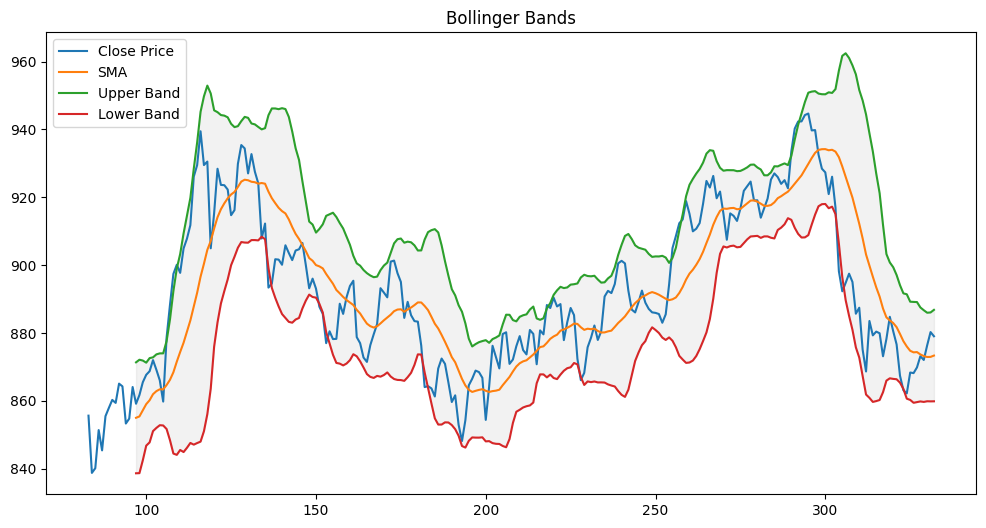

<ipython-input-7-a1257759a211>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy Signal'] = np.where(data['VN30'] < data['Lower Band'], 1, 0)
<ipython-input-7-a1257759a211>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sell Signal'] = np.where(data['VN30'] > data['Upper Band'], -1, 0)
<ipython-input-7-a1257759a211>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

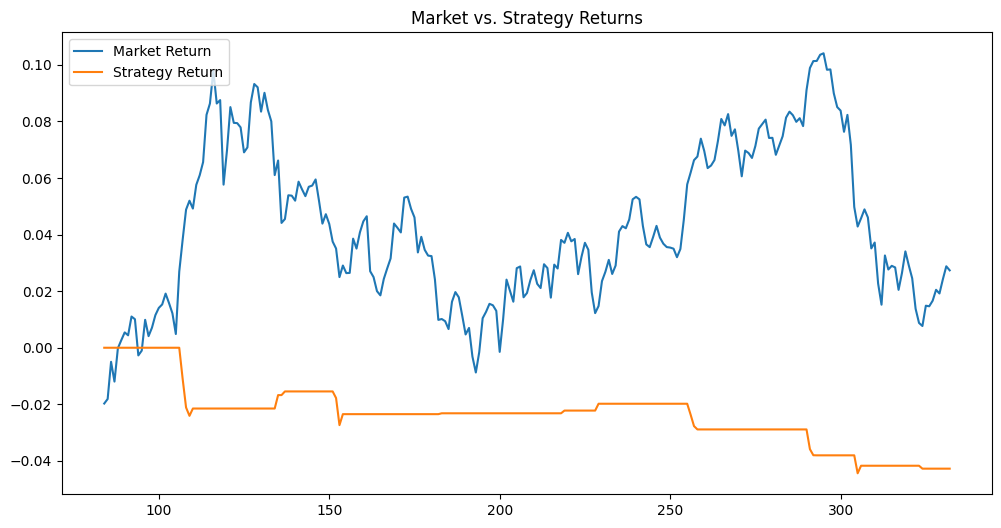

Sharpe Ratio: -2.332123207174243


In [ ]:
# Calculate Bollinger Bands
window = 15
data['SMA'] = data['VN30'].rolling(window=window).mean()
data['STD'] = data['VN30'].rolling(window=window).std()
data['Upper Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band'] = data['SMA'] - (data['STD'] * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['VN30'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands Strategy
data['Buy Signal'] = np.where(data['VN30'] < data['Lower Band'], 1, 0)
data['Sell Signal'] = np.where(data['VN30'] > data['Upper Band'], -1, 0)
data['Position'] = data['Buy Signal'] + data['Sell Signal']

# Calculate daily returns
data['Market Return'] = data['VN30'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Market Return'] = (1 + data['Market Return']).cumprod() - 1
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title('Market vs. Strategy Returns')
plt.legend(loc='upper left')
plt.show()

# Calculate Sharpe Ratio
risk_free_rate = 0.01
excess_returns = data['Strategy Return'] - risk_free_rate / 252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

In [ ]:
data

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STD,Upper Band,Lower Band,Buy Signal,Sell Signal,Position,Market Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
83,2018-11-26,7.76,22.37,78.12,12.68,15.35,60.18,8.3,9.02,9.80,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
84,2018-11-27,7.47,21.37,78.30,12.08,15.20,58.73,8.3,9.01,9.39,...,NaN,NaN,NaN,0,0,0,-0.019716,-0.0,-0.019716,0.000000
85,2018-11-28,7.52,21.07,77.77,12.24,15.32,58.59,8.2,9.28,9.45,...,NaN,NaN,NaN,0,0,0,0.001645,0.0,-0.018103,0.000000
86,2018-11-29,7.62,21.57,77.77,12.11,15.58,59.84,8.1,9.25,9.34,...,NaN,NaN,NaN,0,0,0,0.013378,0.0,-0.004967,0.000000
87,2018-11-30,7.57,21.37,77.42,11.94,15.65,61.22,8.1,9.12,9.18,...,NaN,NaN,NaN,0,0,0,-0.007024,-0.0,-0.011956,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-07-29,7.91,31.22,61.13,13.74,24.51,70.11,9.6,8.54,9.58,...,6.924015,887.553363,859.857303,0,0,0,0.003794,0.0,0.020475,-0.042728
329,2019-07-30,7.81,30.53,60.51,13.74,24.47,69.60,9.7,8.48,9.52,...,6.755069,886.732138,859.711862,0,0,0,-0.001271,-0.0,0.019178,-0.042728
330,2019-07-31,7.84,31.91,61.22,13.78,24.56,70.18,9.4,8.64,9.74,...,6.523352,885.998703,859.905297,0,0,0,0.004942,0.0,0.024215,-0.042728
331,2019-08-01,7.84,31.84,61.76,14.05,24.98,69.75,9.2,8.61,9.79,...,6.550701,886.076735,859.873931,0,0,0,0.004462,0.0,0.028785,-0.042728


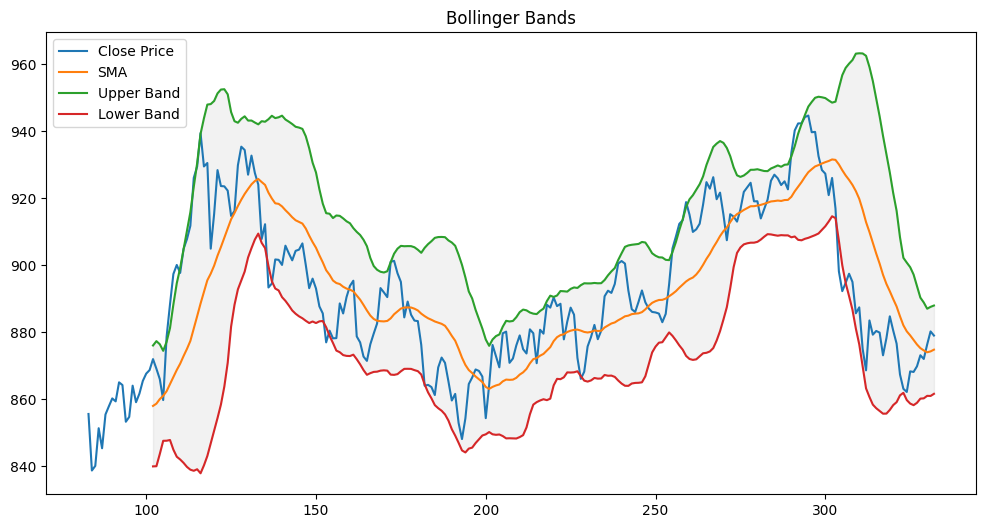

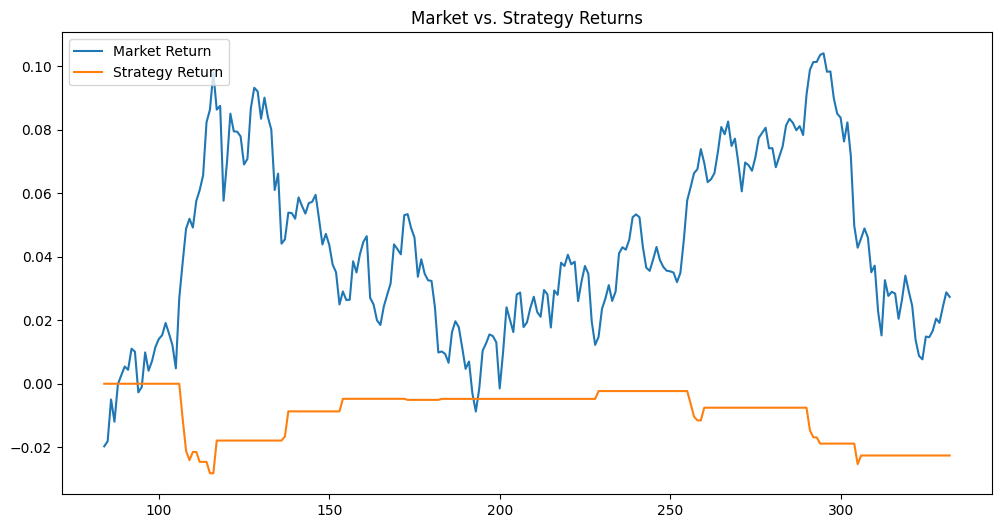

Sharpe Ratio: -1.3008248668573257


In [ ]:
data = pd.read_csv('dataset/VN30/VN30_2018_2019.csv')
data = data.tail(250)

# Calculate Bollinger Bands
window = 20

data['SMA'] = data['VN30'].rolling(window=window).mean()
data['STD'] = data['VN30'].rolling(window=window).std()
data['Upper Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band'] = data['SMA'] - (data['STD'] * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['VN30'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands Strategy
data['Buy Signal'] = np.where(data['VN30'] < data['Lower Band'], 1, 0)
data['Sell Signal'] = np.where(data['VN30'] > data['Upper Band'], -1, 0)
data['Position'] = data['Buy Signal'] + data['Sell Signal']

# Calculate daily returns
data['Market Return'] = data['VN30'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Market Return'] = (1 + data['Market Return']).cumprod() - 1
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title('Market vs. Strategy Returns')
plt.legend(loc='upper left')
plt.show()

# Calculate Sharpe Ratio
risk_free_rate = 0.01
excess_returns = data['Strategy Return'] - risk_free_rate / 252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

In [ ]:
data

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STD,Upper Band,Lower Band,Buy Signal,Sell Signal,Position,Market Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
83,2018-11-26,7.76,22.37,78.12,12.68,15.35,60.18,8.3,9.02,9.80,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
84,2018-11-27,7.47,21.37,78.30,12.08,15.20,58.73,8.3,9.01,9.39,...,NaN,NaN,NaN,0,0,0,-0.019716,-0.0,-0.019716,0.000000
85,2018-11-28,7.52,21.07,77.77,12.24,15.32,58.59,8.2,9.28,9.45,...,NaN,NaN,NaN,0,0,0,0.001645,0.0,-0.018103,0.000000
86,2018-11-29,7.62,21.57,77.77,12.11,15.58,59.84,8.1,9.25,9.34,...,NaN,NaN,NaN,0,0,0,0.013378,0.0,-0.004967,0.000000
87,2018-11-30,7.57,21.37,77.42,11.94,15.65,61.22,8.1,9.12,9.18,...,NaN,NaN,NaN,0,0,0,-0.007024,-0.0,-0.011956,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-07-29,7.91,31.22,61.13,13.74,24.51,70.11,9.6,8.54,9.58,...,7.531313,890.367125,860.241875,0,0,0,0.003794,0.0,0.020475,-0.022599
329,2019-07-30,7.81,30.53,60.51,13.74,24.47,69.60,9.7,8.48,9.52,...,7.148056,888.919112,860.326888,0,0,0,-0.001271,-0.0,0.019178,-0.022599
330,2019-07-31,7.84,31.91,61.22,13.78,24.56,70.18,9.4,8.64,9.74,...,6.499764,887.068028,861.068972,0,0,0,0.004942,0.0,0.024215,-0.022599
331,2019-08-01,7.84,31.84,61.76,14.05,24.98,69.75,9.2,8.61,9.79,...,6.645093,887.618186,861.037814,0,0,0,0.004462,0.0,0.028785,-0.022599


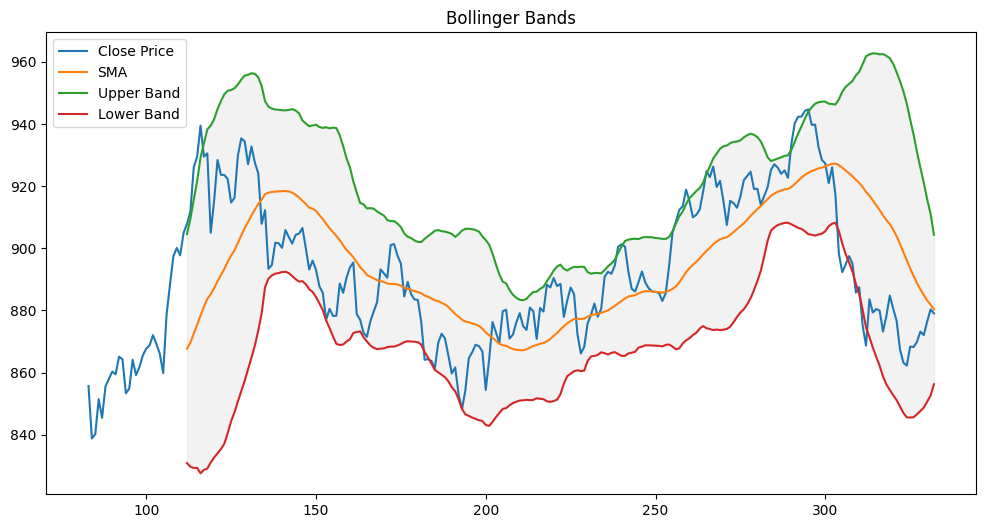

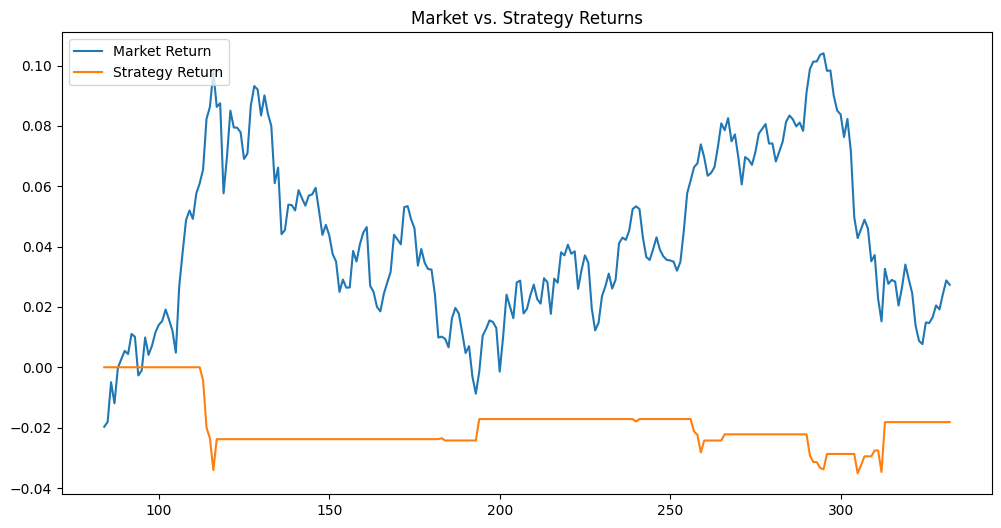

Sharpe Ratio: -0.8247667120515928


In [ ]:
data = pd.read_csv('dataset/VN30/VN30_2018_2019.csv')
data = data.tail(250)

# Calculate Bollinger Bands
window = 30

data['SMA'] = data['VN30'].rolling(window=window).mean()
data['STD'] = data['VN30'].rolling(window=window).std()
data['Upper Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band'] = data['SMA'] - (data['STD'] * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['VN30'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands Strategy
data['Buy Signal'] = np.where(data['VN30'] < data['Lower Band'], 1, 0)
data['Sell Signal'] = np.where(data['VN30'] > data['Upper Band'], -1, 0)
data['Position'] = data['Buy Signal'] + data['Sell Signal']

# Calculate daily returns
data['Market Return'] = data['VN30'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Market Return'] = (1 + data['Market Return']).cumprod() - 1
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title('Market vs. Strategy Returns')
plt.legend(loc='upper left')
plt.show()

# Calculate Sharpe Ratio
risk_free_rate = 0.01
excess_returns = data['Strategy Return'] - risk_free_rate / 252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

In [ ]:
data

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STD,Upper Band,Lower Band,Buy Signal,Sell Signal,Position,Market Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
83,2018-11-26,7.76,22.37,78.12,12.68,15.35,60.18,8.3,9.02,9.80,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
84,2018-11-27,7.47,21.37,78.30,12.08,15.20,58.73,8.3,9.01,9.39,...,NaN,NaN,NaN,0,0,0,-0.019716,-0.0,-0.019716,0.000000
85,2018-11-28,7.52,21.07,77.77,12.24,15.32,58.59,8.2,9.28,9.45,...,NaN,NaN,NaN,0,0,0,0.001645,0.0,-0.018103,0.000000
86,2018-11-29,7.62,21.57,77.77,12.11,15.58,59.84,8.1,9.25,9.34,...,NaN,NaN,NaN,0,0,0,0.013378,0.0,-0.004967,0.000000
87,2018-11-30,7.57,21.37,77.42,11.94,15.65,61.22,8.1,9.12,9.18,...,NaN,NaN,NaN,0,0,0,-0.007024,-0.0,-0.011956,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-07-29,7.91,31.22,61.13,13.74,24.51,70.11,9.6,8.54,9.58,...,19.588652,925.970970,847.616363,0,0,0,0.003794,0.0,0.020475,-0.018184
329,2019-07-30,7.81,30.53,60.51,13.74,24.47,69.60,9.7,8.48,9.52,...,18.103337,921.121340,848.707993,0,0,0,-0.001271,-0.0,0.019178,-0.018184
330,2019-07-31,7.84,31.91,61.22,13.78,24.56,70.18,9.4,8.64,9.74,...,16.282840,915.781013,850.649654,0,0,0,0.004942,0.0,0.024215,-0.018184
331,2019-08-01,7.84,31.84,61.76,14.05,24.98,69.75,9.2,8.61,9.79,...,14.643275,911.146551,852.573449,0,0,0,0.004462,0.0,0.028785,-0.018184


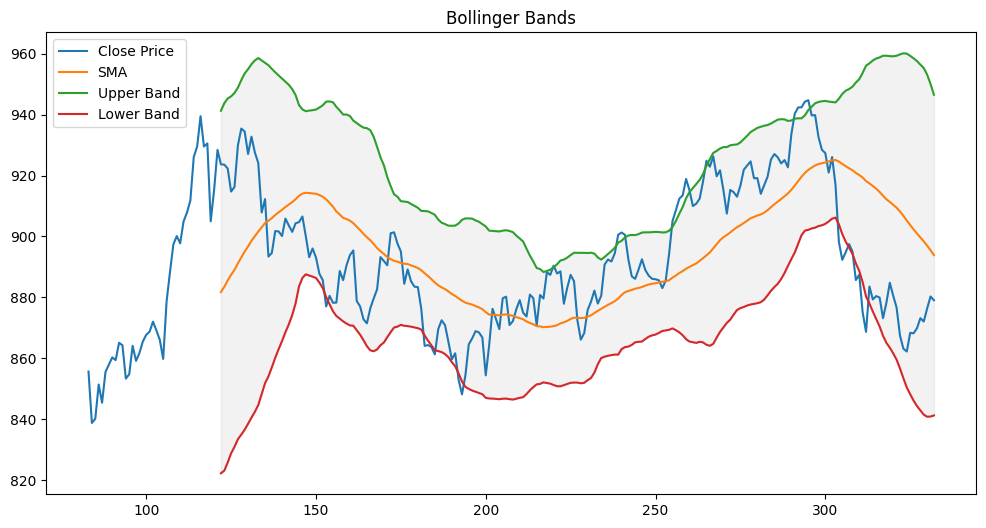

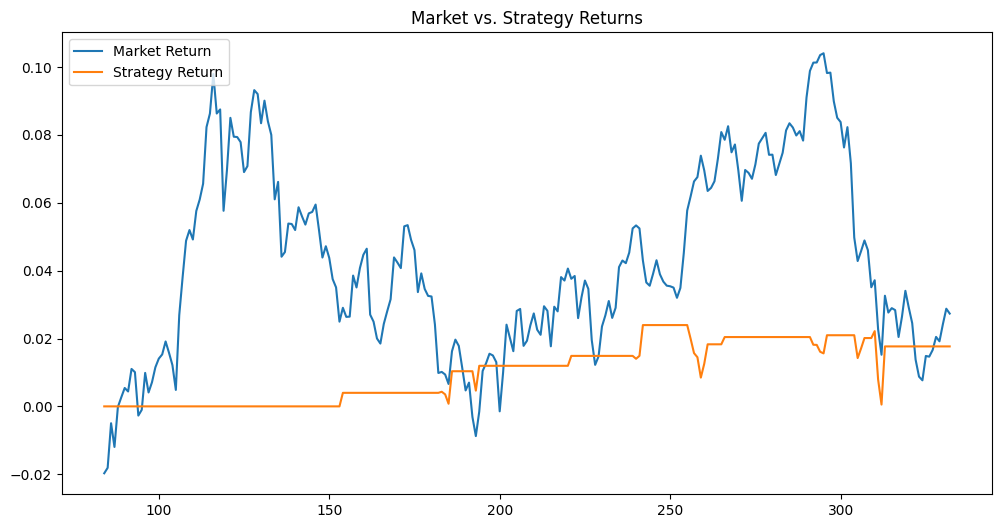

Sharpe Ratio: 0.2524741206876854


In [ ]:
# Calculate Bollinger Bands

data = pd.read_csv('dataset/VN30/VN30_2018_2019.csv')
data = data.tail(250)

window = 40


data['SMA'] = data['VN30'].rolling(window=window).mean()
data['STD'] = data['VN30'].rolling(window=window).std()
data['Upper Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band'] = data['SMA'] - (data['STD'] * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['VN30'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands Strategy
data['Buy Signal'] = np.where(data['VN30'] < data['Lower Band'], 1, 0)
data['Sell Signal'] = np.where(data['VN30'] > data['Upper Band'], -1, 0)
data['Position'] = data['Buy Signal'] + data['Sell Signal']

# Calculate daily returns
data['Market Return'] = data['VN30'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Market Return'] = (1 + data['Market Return']).cumprod() - 1
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title('Market vs. Strategy Returns')
plt.legend(loc='upper left')
plt.show()

# Calculate Sharpe Ratio
risk_free_rate = 0.01
excess_returns = data['Strategy Return'] - risk_free_rate / 252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

In [ ]:
data

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STD,Upper Band,Lower Band,Buy Signal,Sell Signal,Position,Market Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
83,2018-11-26,7.76,22.37,78.12,12.68,15.35,60.18,8.3,9.02,9.80,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
84,2018-11-27,7.47,21.37,78.30,12.08,15.20,58.73,8.3,9.01,9.39,...,NaN,NaN,NaN,0,0,0,-0.019716,-0.0,-0.019716,0.000000
85,2018-11-28,7.52,21.07,77.77,12.24,15.32,58.59,8.2,9.28,9.45,...,NaN,NaN,NaN,0,0,0,0.001645,0.0,-0.018103,0.000000
86,2018-11-29,7.62,21.57,77.77,12.11,15.58,59.84,8.1,9.25,9.34,...,NaN,NaN,NaN,0,0,0,0.013378,0.0,-0.004967,0.000000
87,2018-11-30,7.57,21.37,77.42,11.94,15.65,61.22,8.1,9.12,9.18,...,NaN,NaN,NaN,0,0,0,-0.007024,-0.0,-0.011956,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-07-29,7.91,31.22,61.13,13.74,24.51,70.11,9.6,8.54,9.58,...,28.368518,956.389537,842.915463,0,0,0,0.003794,0.0,0.020475,0.017672
329,2019-07-30,7.81,30.53,60.51,13.74,24.47,69.60,9.7,8.48,9.52,...,28.443662,955.274575,841.499925,0,0,0,-0.001271,-0.0,0.019178,0.017672
330,2019-07-31,7.84,31.91,61.22,13.78,24.56,70.18,9.4,8.64,9.74,...,28.065320,953.088640,840.827360,0,0,0,0.004942,0.0,0.024215,0.017672
331,2019-08-01,7.84,31.84,61.76,14.05,24.98,69.75,9.2,8.61,9.79,...,27.284150,950.027301,840.890699,0,0,0,0.004462,0.0,0.028785,0.017672


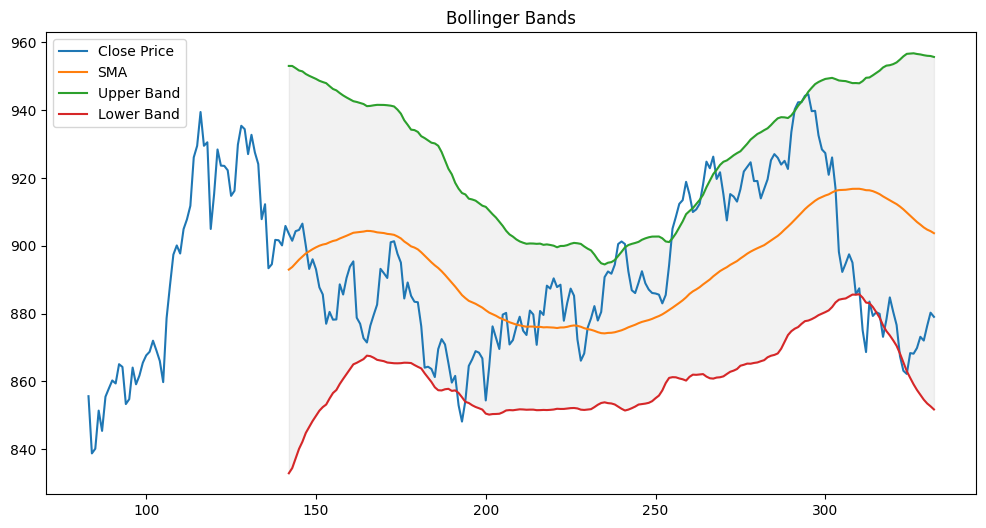

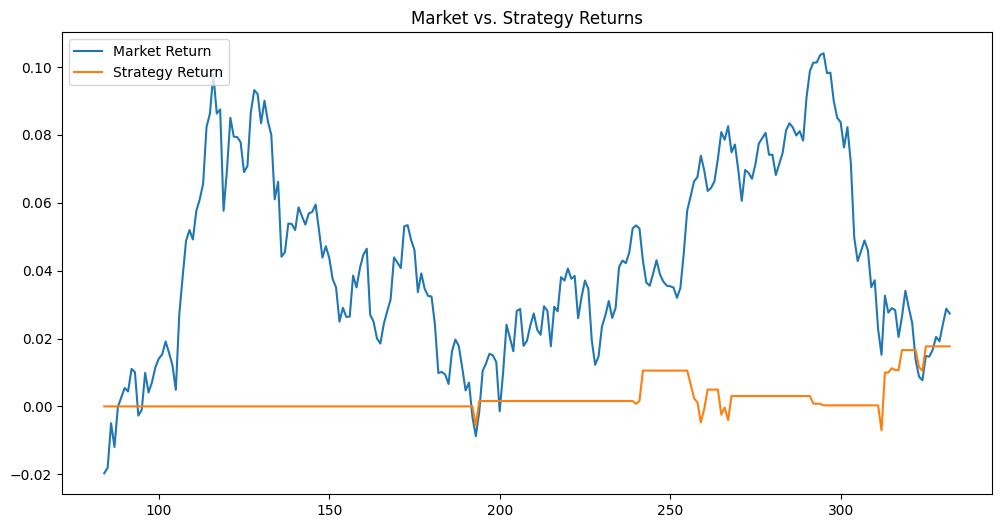

Sharpe Ratio: 0.27528868058785105


In [ ]:
# Calculate Bollinger Bands

data = pd.read_csv('dataset/VN30/VN30_2018_2019.csv')
data = data.tail(250)

window = 60
data['SMA'] = data['VN30'].rolling(window=window).mean()
data['STD'] = data['VN30'].rolling(window=window).std()
data['Upper Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band'] = data['SMA'] - (data['STD'] * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['VN30'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands Strategy
data['Buy Signal'] = np.where(data['VN30'] < data['Lower Band'], 1, 0)
data['Sell Signal'] = np.where(data['VN30'] > data['Upper Band'], -1, 0)
data['Position'] = data['Buy Signal'] + data['Sell Signal']

# Calculate daily returns
data['Market Return'] = data['VN30'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Market Return'] = (1 + data['Market Return']).cumprod() - 1
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title('Market vs. Strategy Returns')
plt.legend(loc='upper left')
plt.show()

# Calculate Sharpe Ratio
risk_free_rate = 0.01
excess_returns = data['Strategy Return'] - risk_free_rate / 252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

In [ ]:
data

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STD,Upper Band,Lower Band,Buy Signal,Sell Signal,Position,Market Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
83,2018-11-26,7.76,22.37,78.12,12.68,15.35,60.18,8.3,9.02,9.80,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
84,2018-11-27,7.47,21.37,78.30,12.08,15.20,58.73,8.3,9.01,9.39,...,NaN,NaN,NaN,0,0,0,-0.019716,-0.0,-0.019716,0.000000
85,2018-11-28,7.52,21.07,77.77,12.24,15.32,58.59,8.2,9.28,9.45,...,NaN,NaN,NaN,0,0,0,0.001645,0.0,-0.018103,0.000000
86,2018-11-29,7.62,21.57,77.77,12.11,15.58,59.84,8.1,9.25,9.34,...,NaN,NaN,NaN,0,0,0,0.013378,0.0,-0.004967,0.000000
87,2018-11-30,7.57,21.37,77.42,11.94,15.65,61.22,8.1,9.12,9.18,...,NaN,NaN,NaN,0,0,0,-0.007024,-0.0,-0.011956,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-07-29,7.91,31.22,61.13,13.74,24.51,70.11,9.6,8.54,9.58,...,25.095368,956.453737,856.072263,0,0,0,0.003794,0.0,0.020475,0.017687
329,2019-07-30,7.81,30.53,60.51,13.74,24.47,69.60,9.7,8.48,9.52,...,25.394074,956.223982,854.647685,0,0,0,-0.001271,-0.0,0.019178,0.017687
330,2019-07-31,7.84,31.91,61.22,13.78,24.56,70.18,9.4,8.64,9.74,...,25.634755,956.059010,853.519990,0,0,0,0.004942,0.0,0.024215,0.017687
331,2019-08-01,7.84,31.84,61.76,14.05,24.98,69.75,9.2,8.61,9.79,...,25.825962,955.987923,852.684077,0,0,0,0.004462,0.0,0.028785,0.017687


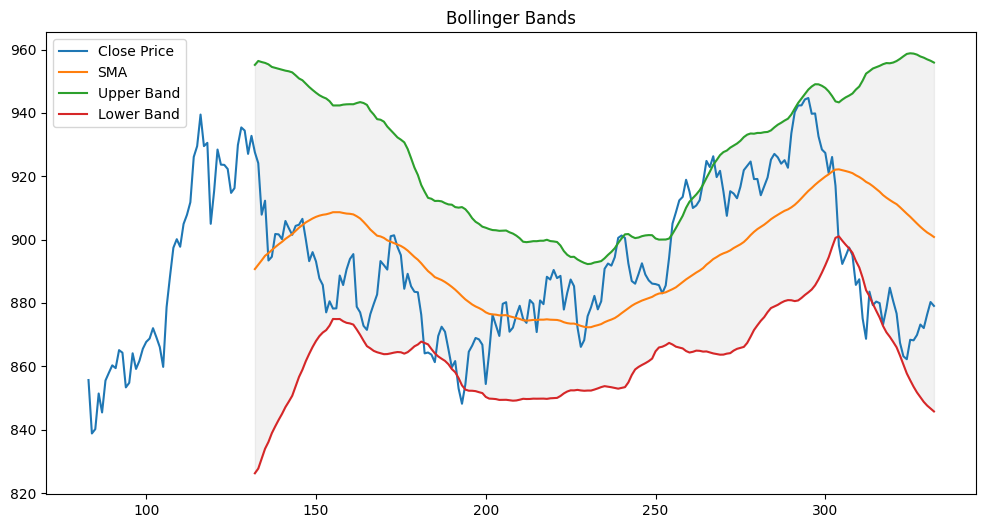

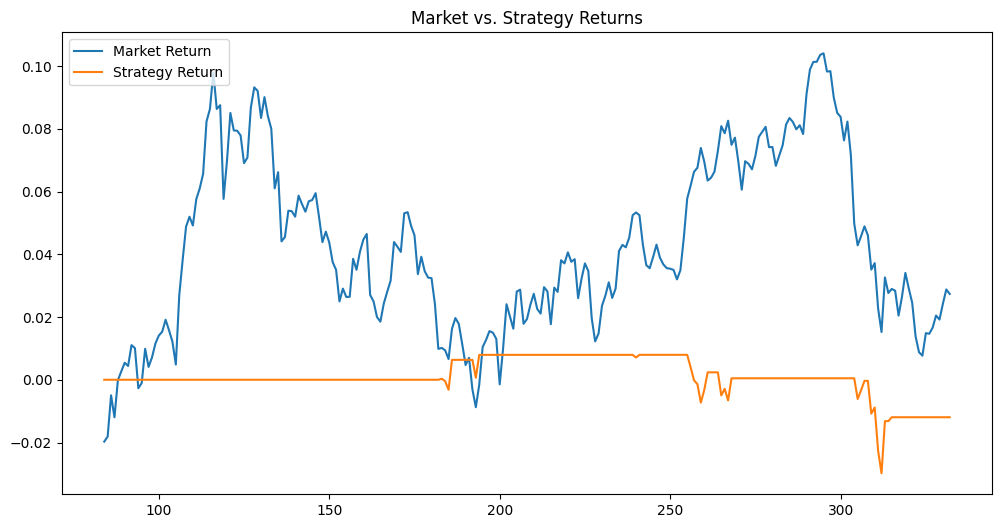

Sharpe Ratio: -0.6334748161153955


In [ ]:
# Calculate Bollinger Bands
data = pd.read_csv('dataset/VN30/VN30_2018_2019.csv')
data = data.tail(250)


window = 50
data['SMA'] = data['VN30'].rolling(window=window).mean()
data['STD'] = data['VN30'].rolling(window=window).std()
data['Upper Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band'] = data['SMA'] - (data['STD'] * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['VN30'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands Strategy
data['Buy Signal'] = np.where(data['VN30'] < data['Lower Band'], 1, 0)
data['Sell Signal'] = np.where(data['VN30'] > data['Upper Band'], -1, 0)
data['Position'] = data['Buy Signal'] + data['Sell Signal']

# Calculate daily returns
data['Market Return'] = data['VN30'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Market Return'] = (1 + data['Market Return']).cumprod() - 1
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title('Market vs. Strategy Returns')
plt.legend(loc='upper left')
plt.show()

# Calculate Sharpe Ratio
risk_free_rate = 0.01
excess_returns = data['Strategy Return'] - risk_free_rate / 252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

In [ ]:
data

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STD,Upper Band,Lower Band,Buy Signal,Sell Signal,Position,Market Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
83,2018-11-26,7.76,22.37,78.12,12.68,15.35,60.18,8.3,9.02,9.80,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
84,2018-11-27,7.47,21.37,78.30,12.08,15.20,58.73,8.3,9.01,9.39,...,NaN,NaN,NaN,0,0,0,-0.019716,-0.0,-0.019716,0.000000
85,2018-11-28,7.52,21.07,77.77,12.24,15.32,58.59,8.2,9.28,9.45,...,NaN,NaN,NaN,0,0,0,0.001645,0.0,-0.018103,0.000000
86,2018-11-29,7.62,21.57,77.77,12.11,15.58,59.84,8.1,9.25,9.34,...,NaN,NaN,NaN,0,0,0,0.013378,0.0,-0.004967,0.000000
87,2018-11-30,7.57,21.37,77.42,11.94,15.65,61.22,8.1,9.12,9.18,...,NaN,NaN,NaN,0,0,0,-0.007024,-0.0,-0.011956,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-07-29,7.91,31.22,61.13,13.74,24.51,70.11,9.6,8.54,9.58,...,26.884133,957.809465,850.272935,0,0,0,0.003794,0.0,0.020475,-0.011944
329,2019-07-30,7.81,30.53,60.51,13.74,24.47,69.60,9.7,8.48,9.52,...,27.167743,957.436086,848.765114,0,0,0,-0.001271,-0.0,0.019178,-0.011944
330,2019-07-31,7.84,31.91,61.22,13.78,24.56,70.18,9.4,8.64,9.74,...,27.325224,956.896047,847.595153,0,0,0,0.004942,0.0,0.024215,-0.011944
331,2019-08-01,7.84,31.84,61.76,14.05,24.98,69.75,9.2,8.61,9.79,...,27.444891,956.461182,846.681618,0,0,0,0.004462,0.0,0.028785,-0.011944


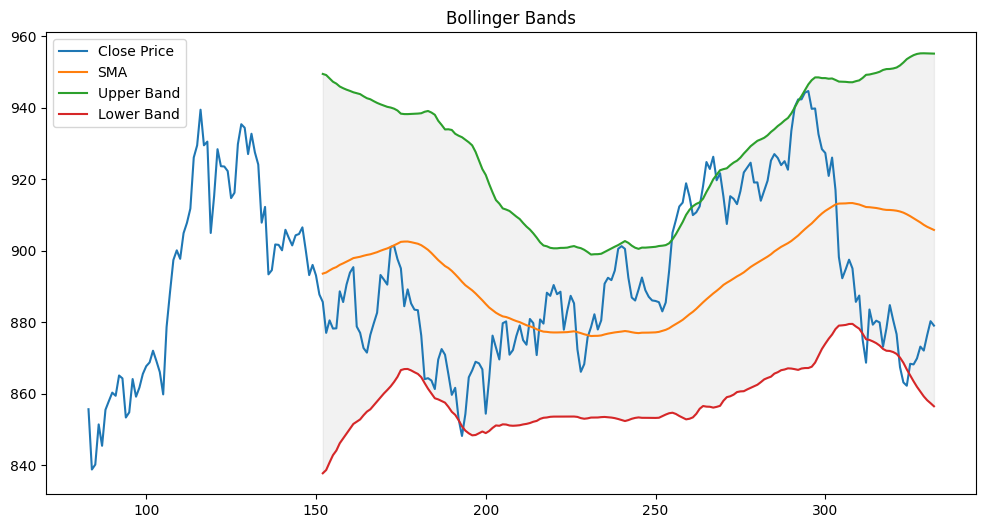

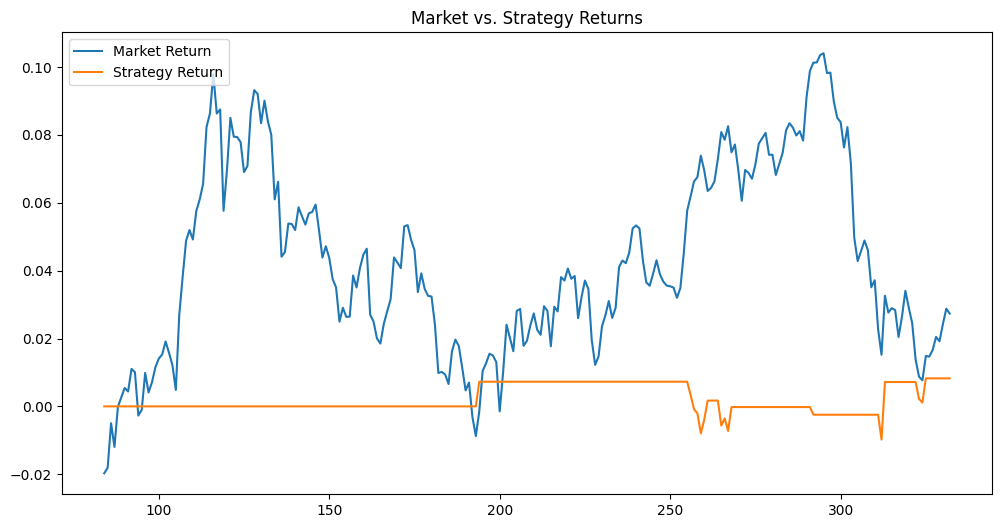

Sharpe Ratio: -0.04843061756894033


In [ ]:
# Calculate Bollinger Bands
data = pd.read_csv('dataset/VN30/VN30_2018_2019.csv')
data = data.tail(250)

window = 70
data['SMA'] = data['VN30'].rolling(window=window).mean()
data['STD'] = data['VN30'].rolling(window=window).std()
data['Upper Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band'] = data['SMA'] - (data['STD'] * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['VN30'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands Strategy
data['Buy Signal'] = np.where(data['VN30'] < data['Lower Band'], 1, 0)
data['Sell Signal'] = np.where(data['VN30'] > data['Upper Band'], -1, 0)
data['Position'] = data['Buy Signal'] + data['Sell Signal']

# Calculate daily returns
data['Market Return'] = data['VN30'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Market Return'] = (1 + data['Market Return']).cumprod() - 1
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title('Market vs. Strategy Returns')
plt.legend(loc='upper left')
plt.show()

# Calculate Sharpe Ratio
risk_free_rate = 0.01
excess_returns = data['Strategy Return'] - risk_free_rate / 252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

In [ ]:
data

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STD,Upper Band,Lower Band,Buy Signal,Sell Signal,Position,Market Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
83,2018-11-26,7.76,22.37,78.12,12.68,15.35,60.18,8.3,9.02,9.80,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
84,2018-11-27,7.47,21.37,78.30,12.08,15.20,58.73,8.3,9.01,9.39,...,NaN,NaN,NaN,0,0,0,-0.019716,-0.0,-0.019716,0.000000
85,2018-11-28,7.52,21.07,77.77,12.24,15.32,58.59,8.2,9.28,9.45,...,NaN,NaN,NaN,0,0,0,0.001645,0.0,-0.018103,0.000000
86,2018-11-29,7.62,21.57,77.77,12.11,15.58,59.84,8.1,9.25,9.34,...,NaN,NaN,NaN,0,0,0,0.013378,0.0,-0.004967,0.000000
87,2018-11-30,7.57,21.37,77.42,11.94,15.65,61.22,8.1,9.12,9.18,...,NaN,NaN,NaN,0,0,0,-0.007024,-0.0,-0.011956,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-07-29,7.91,31.22,61.13,13.74,24.51,70.11,9.6,8.54,9.58,...,23.657599,955.241484,860.611088,0,0,0,0.003794,0.0,0.020475,0.008261
329,2019-07-30,7.81,30.53,60.51,13.74,24.47,69.60,9.7,8.48,9.52,...,24.002549,955.262670,859.252472,0,0,0,-0.001271,-0.0,0.019178,0.008261
330,2019-07-31,7.84,31.91,61.22,13.78,24.56,70.18,9.4,8.64,9.74,...,24.263629,955.230830,858.176313,0,0,0,0.004942,0.0,0.024215,0.008261
331,2019-08-01,7.84,31.84,61.76,14.05,24.98,69.75,9.2,8.61,9.79,...,24.464196,955.207821,857.351037,0,0,0,0.004462,0.0,0.028785,0.008261


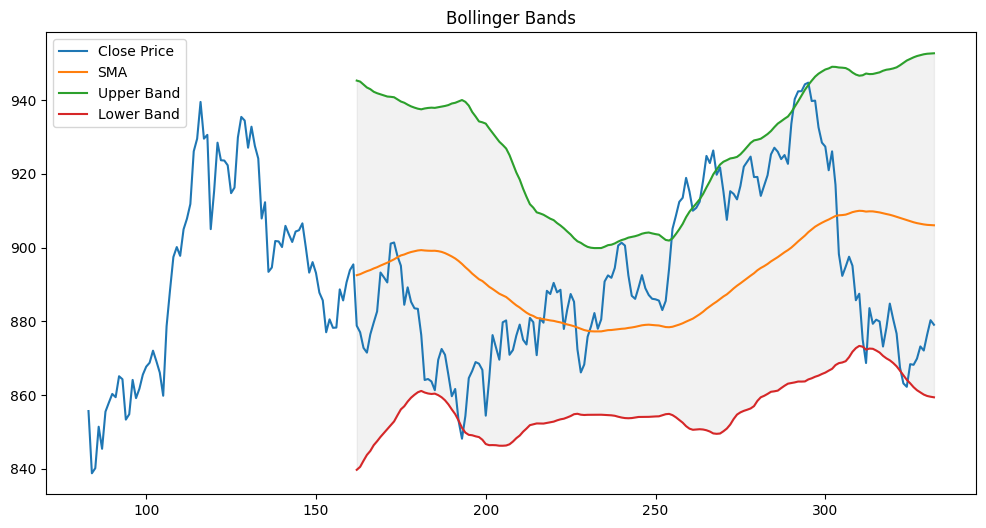

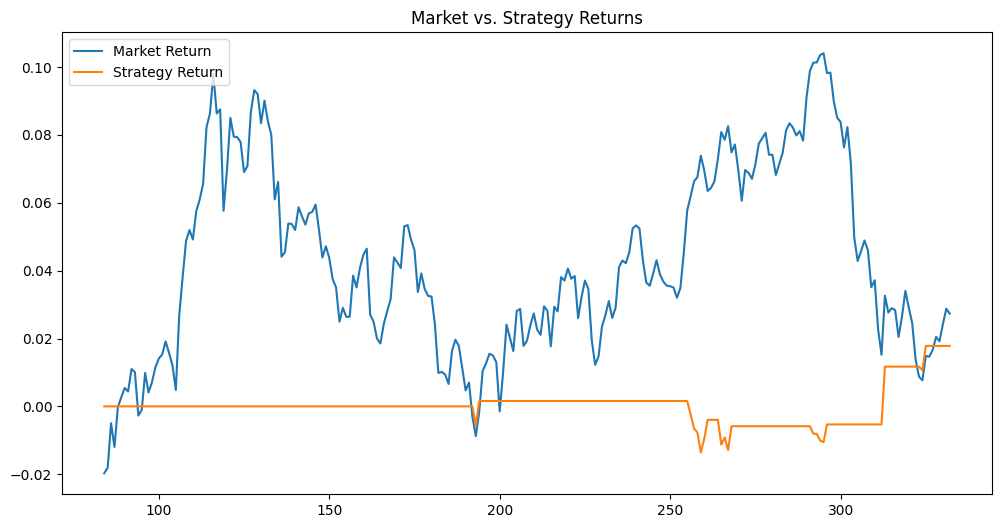

Sharpe Ratio: 0.3074811820505765


In [ ]:
# Calculate Bollinger Bands
data = pd.read_csv('dataset/VN30/VN30_2018_2019.csv')
data = data.tail(250)

window = 80
data['SMA'] = data['VN30'].rolling(window=window).mean()
data['STD'] = data['VN30'].rolling(window=window).std()
data['Upper Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band'] = data['SMA'] - (data['STD'] * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['VN30'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands Strategy
data['Buy Signal'] = np.where(data['VN30'] < data['Lower Band'], 1, 0)
data['Sell Signal'] = np.where(data['VN30'] > data['Upper Band'], -1, 0)
data['Position'] = data['Buy Signal'] + data['Sell Signal']

# Calculate daily returns
data['Market Return'] = data['VN30'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Market Return'] = (1 + data['Market Return']).cumprod() - 1
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title('Market vs. Strategy Returns')
plt.legend(loc='upper left')
plt.show()

# Calculate Sharpe Ratio
risk_free_rate = 0.01
excess_returns = data['Strategy Return'] - risk_free_rate / 252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

In [ ]:
data

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STD,Upper Band,Lower Band,Buy Signal,Sell Signal,Position,Market Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
83,2018-11-26,7.76,22.37,78.12,12.68,15.35,60.18,8.3,9.02,9.80,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
84,2018-11-27,7.47,21.37,78.30,12.08,15.20,58.73,8.3,9.01,9.39,...,NaN,NaN,NaN,0,0,0,-0.019716,-0.0,-0.019716,0.000000
85,2018-11-28,7.52,21.07,77.77,12.24,15.32,58.59,8.2,9.28,9.45,...,NaN,NaN,NaN,0,0,0,0.001645,0.0,-0.018103,0.000000
86,2018-11-29,7.62,21.57,77.77,12.11,15.58,59.84,8.1,9.25,9.34,...,NaN,NaN,NaN,0,0,0,0.013378,0.0,-0.004967,0.000000
87,2018-11-30,7.57,21.37,77.42,11.94,15.65,61.22,8.1,9.12,9.18,...,NaN,NaN,NaN,0,0,0,-0.007024,-0.0,-0.011956,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-07-29,7.91,31.22,61.13,13.74,24.51,70.11,9.6,8.54,9.58,...,22.854431,952.144988,860.727262,0,0,0,0.003794,0.0,0.020475,0.017821
329,2019-07-30,7.81,30.53,60.51,13.74,24.47,69.60,9.7,8.48,9.52,...,23.065314,952.391379,860.130121,0,0,0,-0.001271,-0.0,0.019178,0.017821
330,2019-07-31,7.84,31.91,61.22,13.78,24.56,70.18,9.4,8.64,9.74,...,23.196431,952.533987,859.748263,0,0,0,0.004942,0.0,0.024215,0.017821
331,2019-08-01,7.84,31.84,61.76,14.05,24.98,69.75,9.2,8.61,9.79,...,23.263563,952.601752,859.547498,0,0,0,0.004462,0.0,0.028785,0.017821


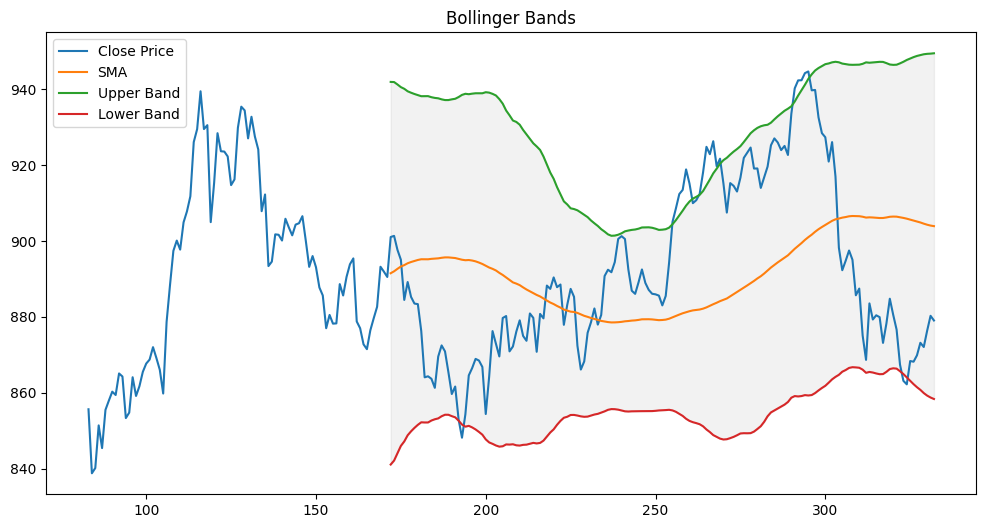

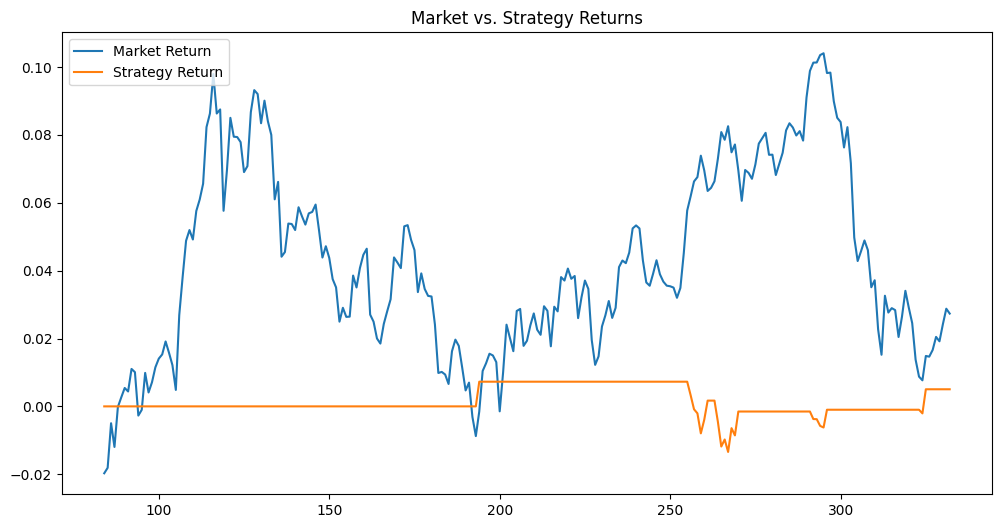

Sharpe Ratio: -0.21257800130192084


In [ ]:
# Calculate Bollinger Bands

data = pd.read_csv('dataset/VN30/VN30_2018_2019.csv')
data = data.tail(250)

window = 90
data['SMA'] = data['VN30'].rolling(window=window).mean()
data['STD'] = data['VN30'].rolling(window=window).std()
data['Upper Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band'] = data['SMA'] - (data['STD'] * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['VN30'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands Strategy
data['Buy Signal'] = np.where(data['VN30'] < data['Lower Band'], 1, 0)
data['Sell Signal'] = np.where(data['VN30'] > data['Upper Band'], -1, 0)
data['Position'] = data['Buy Signal'] + data['Sell Signal']

# Calculate daily returns
data['Market Return'] = data['VN30'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Market Return'] = (1 + data['Market Return']).cumprod() - 1
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title('Market vs. Strategy Returns')
plt.legend(loc='upper left')
plt.show()

# Calculate Sharpe Ratio
risk_free_rate = 0.01
excess_returns = data['Strategy Return'] - risk_free_rate / 252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

In [ ]:
data

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STD,Upper Band,Lower Band,Buy Signal,Sell Signal,Position,Market Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
83,2018-11-26,7.76,22.37,78.12,12.68,15.35,60.18,8.3,9.02,9.80,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
84,2018-11-27,7.47,21.37,78.30,12.08,15.20,58.73,8.3,9.01,9.39,...,NaN,NaN,NaN,0,0,0,-0.019716,-0.0,-0.019716,0.000000
85,2018-11-28,7.52,21.07,77.77,12.24,15.32,58.59,8.2,9.28,9.45,...,NaN,NaN,NaN,0,0,0,0.001645,0.0,-0.018103,0.000000
86,2018-11-29,7.62,21.57,77.77,12.11,15.58,59.84,8.1,9.25,9.34,...,NaN,NaN,NaN,0,0,0,0.013378,0.0,-0.004967,0.000000
87,2018-11-30,7.57,21.37,77.42,11.94,15.65,61.22,8.1,9.12,9.18,...,NaN,NaN,NaN,0,0,0,-0.007024,-0.0,-0.011956,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-07-29,7.91,31.22,61.13,13.74,24.51,70.11,9.6,8.54,9.58,...,22.059107,949.012103,860.775675,0,0,0,0.003794,0.0,0.020475,0.005041
329,2019-07-30,7.81,30.53,60.51,13.74,24.47,69.60,9.7,8.48,9.52,...,22.324778,949.227112,859.927999,0,0,0,-0.001271,-0.0,0.019178,0.005041
330,2019-07-31,7.84,31.91,61.22,13.78,24.56,70.18,9.4,8.64,9.74,...,22.519559,949.339897,859.261659,0,0,0,0.004942,0.0,0.024215,0.005041
331,2019-08-01,7.84,31.84,61.76,14.05,24.98,69.75,9.2,8.61,9.79,...,22.658274,949.392437,858.759341,0,0,0,0.004462,0.0,0.028785,0.005041


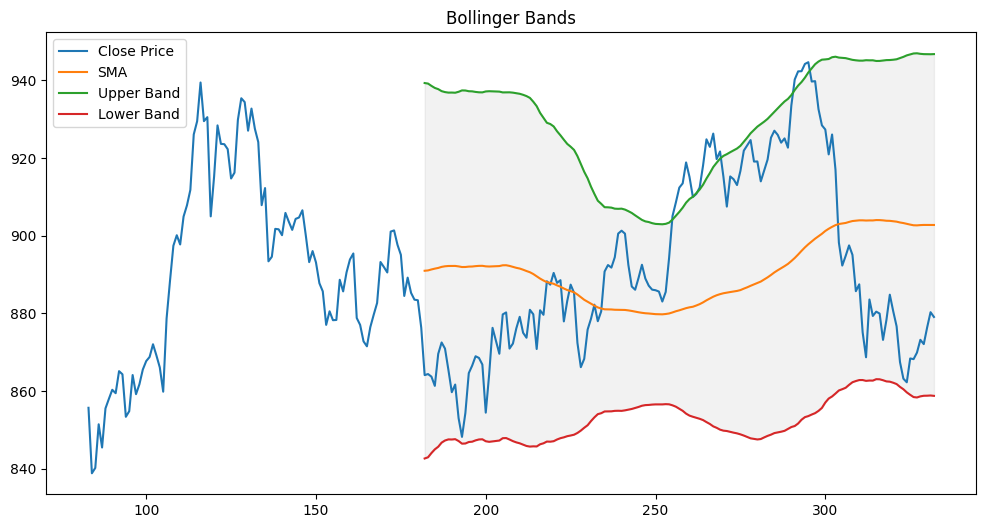

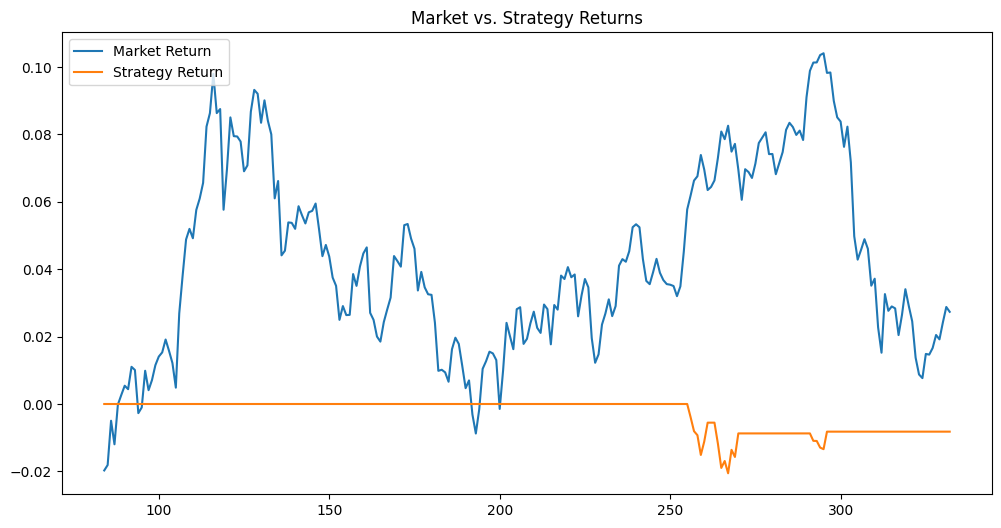

Sharpe Ratio: -0.9358065723874683


In [ ]:
# Calculate Bollinger Bands

data = pd.read_csv('dataset/VN30/VN30_2018_2019.csv')
data = data.tail(250)

window = 100
data['SMA'] = data['VN30'].rolling(window=window).mean()
data['STD'] = data['VN30'].rolling(window=window).std()
data['Upper Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band'] = data['SMA'] - (data['STD'] * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['VN30'], label='Close Price')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands Strategy
data['Buy Signal'] = np.where(data['VN30'] < data['Lower Band'], 1, 0)
data['Sell Signal'] = np.where(data['VN30'] > data['Upper Band'], -1, 0)
data['Position'] = data['Buy Signal'] + data['Sell Signal']

# Calculate daily returns
data['Market Return'] = data['VN30'].pct_change()
data['Strategy Return'] = data['Market Return'] * data['Position'].shift(1)

# Calculate cumulative returns
data['Cumulative Market Return'] = (1 + data['Market Return']).cumprod() - 1
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Market Return'], label='Market Return')
plt.plot(data['Cumulative Strategy Return'], label='Strategy Return')
plt.title('Market vs. Strategy Returns')
plt.legend(loc='upper left')
plt.show()

# Calculate Sharpe Ratio
risk_free_rate = 0.01
excess_returns = data['Strategy Return'] - risk_free_rate / 252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

In [ ]:
data

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,STD,Upper Band,Lower Band,Buy Signal,Sell Signal,Position,Market Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
83,2018-11-26,7.76,22.37,78.12,12.68,15.35,60.18,8.3,9.02,9.80,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
84,2018-11-27,7.47,21.37,78.30,12.08,15.20,58.73,8.3,9.01,9.39,...,NaN,NaN,NaN,0,0,0,-0.019716,-0.0,-0.019716,0.000000
85,2018-11-28,7.52,21.07,77.77,12.24,15.32,58.59,8.2,9.28,9.45,...,NaN,NaN,NaN,0,0,0,0.001645,0.0,-0.018103,0.000000
86,2018-11-29,7.62,21.57,77.77,12.11,15.58,59.84,8.1,9.25,9.34,...,NaN,NaN,NaN,0,0,0,0.013378,0.0,-0.004967,0.000000
87,2018-11-30,7.57,21.37,77.42,11.94,15.65,61.22,8.1,9.12,9.18,...,NaN,NaN,NaN,0,0,0,-0.007024,-0.0,-0.011956,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-07-29,7.91,31.22,61.13,13.74,24.51,70.11,9.6,8.54,9.58,...,22.062090,946.857279,858.608921,0,0,0,0.003794,0.0,0.020475,-0.008204
329,2019-07-30,7.81,30.53,60.51,13.74,24.47,69.60,9.7,8.48,9.52,...,22.005330,946.781760,858.760440,0,0,0,-0.001271,-0.0,0.019178,-0.008204
330,2019-07-31,7.84,31.91,61.22,13.78,24.56,70.18,9.4,8.64,9.74,...,21.998349,946.773497,858.780103,0,0,0,0.004942,0.0,0.024215,-0.008204
331,2019-08-01,7.84,31.84,61.76,14.05,24.98,69.75,9.2,8.61,9.79,...,21.980451,946.754403,858.832597,0,0,0,0.004462,0.0,0.028785,-0.008204


In [ ]:
data.to_csv('VN30_2018_2019_BB.csv')

# **Change-point strategy**

In [ ]:
!python -m uni2ts.data.builder.simple VN30_test dataset/VN30/VN30_2018_2019.csv --dataset_type wide_multivariate

/content/uni2ts/src/uni2ts/common/env.py:43: UserWarning: Failed to load .env file.
  warnings.warn("Failed to load .env file.")
Saving the dataset (1/1 shards): 100% 1/1 [00:00<00:00, 157.18 examples/s]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


import numpy as np
import pickle
import gdown
import datasets

**Chạy change-point dectection trong vòng 1 năm 2019:**

In [ ]:
# 1
!python -m cli.eval run_name=base_eval_2306 model=moirai_1.0_R_base model.patch_size=32 model.context_length=500 data=vn30_test


with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

2024-07-09 13:31:30.485419: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 13:31:30.485477: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 13:31:30.487949: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-09 13:31:30.500130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 13:31:32.276823: W tensorflow/compiler/tf2

In [ ]:
temp1 = None
forecasts = forecast[0]
for i in range(49):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(49):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(250, )

**Visualization**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_forecast(forecast, labels, change_num):

    # Tính đường median
    median = np.median(forecast, axis=0)

    # Tính các khoảng tin cậy
    ci90_lower = np.percentile(forecast, 5, axis=0)
    ci90_upper = np.percentile(forecast, 95, axis=0)
    ci70_lower = np.percentile(forecast, 15, axis=0)
    ci70_upper = np.percentile(forecast, 85, axis=0)

    # Tính MAE cho từng ngày
    mae_per_day = np.mean(np.abs(labels - forecast), axis=0)
    print("MAE per day:\n", mae_per_day)

    # Lấy ra top 10 ngày có MAE lớn nhất
    top_10_days = np.argsort(mae_per_day)[-change_num:][::-1]

    # Vẽ biểu đồ
    days = np.arange(1, forecast.shape[1] + 1)
    plt.figure(figsize=(14, 7))

    plt.plot(days, median, label='Prediction (Median)', linestyle='--', color='blue')

    plt.fill_between(days, ci90_lower, ci90_upper, color='#ccccff', label='90% Confidence Interval')
    plt.fill_between(days, ci70_lower, ci70_upper, color='#9999ee', label='70% Confidence Interval')

    # Vẽ đường labels
    plt.plot(days, labels, label='Target', color='black')

    # Đánh dấu top 10 ngày có MAE lớn nhất trên đường labels với style vòng tròn có viền màu đỏ, không cần fill màu
    plt.plot(top_10_days + 1, labels[top_10_days], 'o', markerfacecolor='none', markeredgecolor='red', markersize=8, label='Change-point')

    # Hiển thị nhãn cho top 10 ngày trên đường labels
    temp = []
    for day in top_10_days:
        plt.text(day + 1, labels[day], f'{day + 1}', fontsize=10, ha='center', va='bottom')
        if labels[day] < ci90_lower[day] or labels[day] > ci90_upper[day]:
            print(f'Ngày {day + 1} nằm ngoài khoảng tin cậy 90%')
            temp.append(day + 1)

    plt.xlabel('Time')
    plt.ylabel('Forecast Value')
    plt.title('Top 25 Change-points')

    plt.legend()
    plt.show()

    return mae_per_day, top_10_days, temp

MAE per day:
 [23.854342  41.346275  51.817413  35.666725  40.475754  40.414265
 49.680588  37.738144  46.861225  48.916237  20.79924   33.022045
 33.487167  24.295332  27.985619  26.448774  26.04936   25.385452
 26.4063    27.523283  12.778291  17.573725  25.457867  19.25302
 19.541582  16.879963  17.131636  19.739208  17.596497  19.582464
 13.511517   5.733286   6.101941  14.250866   7.3738184  6.796031
 27.413862  18.598703  10.426499  10.246108  14.652845  16.23796
 23.58855   22.759956  10.445305   7.746776  10.502434  17.453022
 12.156939  17.990925  12.603093  30.082703  25.881325  43.34849
 42.829712  15.650887  17.122164  16.068716  22.789818  23.392841
 14.67034   14.342197  18.478033  20.827604  20.433054   9.763076
  9.844819  13.660676  17.417227  19.717762  22.366533  19.547945
 25.473484  20.216978  18.922651  29.348648  24.966824  23.770655
 22.005058  33.757877  17.140968  25.762358  20.438467  25.552944
 22.608652  14.277478  15.45384   21.59739   25.174397  26.205181

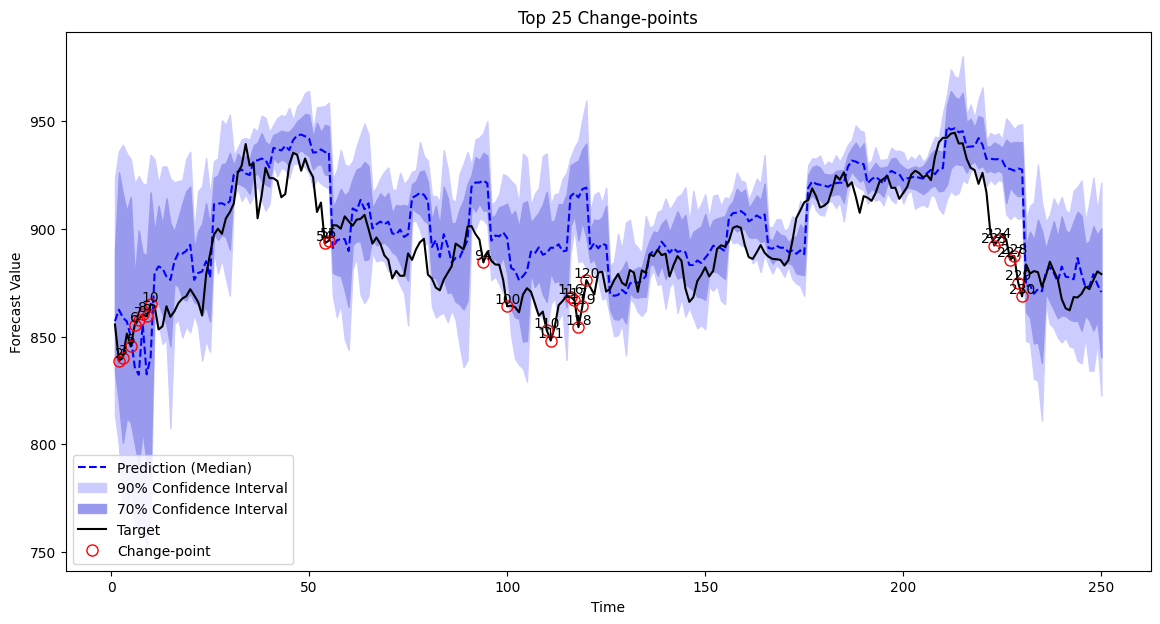

In [ ]:
mae_forecasts = forecasts
mae_labels = labels

mae_per_day, top_10_days, temp = plot_forecast(mae_forecasts, mae_labels, change_num = 25)

**Xây dựng chiến thuật: Mua vào ở những ngày change-point nằm ngoài khoảng 90% và bán ra vào ngày hôm sau.**

In [ ]:
temp.sort()

In [ ]:
temp

[54, 55, 94, 100, 111, 116, 117, 118, 119, 120, 223, 224, 227, 228, 229, 230]

In [ ]:
df = pd.read_csv('dataset/VN30/CP.csv')
df

,time,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,VJC,VNM,VPB,VRE,VN30,Position (Change-point),Market Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
0,26/11/2018,7.76,22.37,78.12,12.68,15.35,60.18,8.3,9.02,9.80,...,115.98,82.46,6.50,27.97,855.66,0.0,NaN,NaN,NaN,NaN
1,27/11/2018,7.47,21.37,78.30,12.08,15.20,58.73,8.3,9.01,9.39,...,115.19,81.73,6.37,26.90,838.79,0.0,-0.019716,0.0,-0.019716,0.000000
2,28/11/2018,7.52,21.07,77.77,12.24,15.32,58.59,8.2,9.28,9.45,...,114.00,83.12,6.35,26.71,840.17,0.0,0.001645,0.0,-0.018103,0.000000
3,29/11/2018,7.62,21.57,77.77,12.11,15.58,59.84,8.1,9.25,9.34,...,114.99,87.11,6.45,27.10,851.41,0.0,0.013378,0.0,-0.004967,0.000000
4,30/11/2018,7.57,21.37,77.42,11.94,15.65,61.22,8.1,9.12,9.18,...,114.00,86.45,6.42,26.81,845.43,0.0,-0.007024,0.0,-0.011956,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,30/07/2019,7.81,30.53,60.51,13.74,24.47,69.60,9.7,8.48,9.52,...,143.70,80.72,6.60,33.30,872.07,0.0,-0.001271,0.0,0.019178,0.031282
247,31/07/2019,7.84,31.91,61.22,13.78,24.56,70.18,9.4,8.64,9.74,...,143.60,81.55,6.60,33.40,876.38,0.0,0.004942,0.0,0.024215,0.031282
248,01/08/2019,7.84,31.84,61.76,14.05,24.98,69.75,9.2,8.61,9.79,...,144.40,80.38,6.64,34.50,880.29,0.0,0.004462,0.0,0.028785,0.031282
249,02/08/2019,7.88,31.87,61.04,13.95,24.86,67.79,9.5,8.82,9.72,...,146.20,80.38,6.70,34.00,879.06,0.0,-0.001397,0.0,0.027347,0.031282


In [ ]:
# Calculate Sharpe Ratio Change-point
risk_free_rate = 0.01
excess_returns = df['Strategy Return'] - risk_free_rate /252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

Sharpe Ratio: 0.6065288491449435


In [ ]:
# Calculate Sharpe Ratio
risk_free_rate = 0.01
excess_returns = df['Market Return'] - risk_free_rate /252
sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

print(f'Sharpe Ratio: {sharpe_ratio}')

Sharpe Ratio: 0.209477587843797
